# Introduction
#

## Implementation

### Task 1 – Tokenization on LABR (Arabic Book Reviews)

This section loads the LABR sentiment dataset from Hugging Face and applies word-level tokenization to the Arabic review texts using `tf.keras.preprocessing.text.Tokenizer`. The goal is to build a word index (vocabulary) that maps each distinct token to an integer ID, which will be used in later steps for sequencing and model training.

In [1]:
from datasets import load_dataset
from tensorflow.keras.preprocessing.text import Tokenizer
import re


c:\Users\osama\anaconda3\envs\tf-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

data_path = "data/reviews.tsv"  # adjust if needed

df = pd.read_csv(
    data_path,
    sep="\t",
    header=None,
    names=["rating", "review_id", "user_id", "book_id", "text"],
)

len(df), df.head()


(63257,
    rating  review_id   user_id   book_id  \
 0       4  338670838   7878381  13431841   
 1       4   39428407   1775679   3554772   
 2       4   32159373   1304410   3554772   
 3       1  442326656  11333112   3554772   
 4       5   46492258    580165   3554772   
 
                                                 text  
 0   "عزازيل الذي صنعناه ،الكامن في أنفسنا" يذكرني...  
 1   من أمتع ما قرأت من روايات بلا شك. وحول الشك ت...  
 2   رواية تتخذ من التاريخ ،جوًا لها اختار المؤلف ...  
 3   إني أقدّر هذه الرواية كثيرا، لسبب مختلف عن أس...  
 4   الكاهن الذي أطلق على نفسه اسم هيبا تيمنا بالع...  )

In [3]:
for i in range(3):
    print("Review", i)
    print(df.loc[i, "text"])
    print("Rating:", df.loc[i, "rating"])
    print("-" * 80)


Review 0
 "عزازيل الذي صنعناه ،الكامن في أنفسنا" يذكرني يوسف زيدان بــ بورخس في استخدامه لحيلته الفنية،وخداع القاريء بأن الرواية ترجمة لمخطوط قديم. الهوامش المخترعة و اختلاق وجود مترجـِم عاد بي إلى بورخس و هوامشه و كتَّابه الوهميين. هذه أولى قراءاتي ليوسف زيدان ،وهو عبقري في السرد ويخلقُ جوَّا ساحرا متفرداً يغرقك في المتعة. هُنا يتجلى الشكُّ الراقي الممزوج بانسانية هيبا الفاتنة ربما تم تناول فكرة الرواية قبلاً ،ولكن هنا تفرداً و عذوبة لا تُقارن بنصٍ آخر كنتُ أودُّ لو صيغت النهاية بطريقة مختلفة فقد جاءت باردة لا تتناسب مع رواية خُطَّت بهذا الشغف . ولذا لا أستطيع منح الرواية خمس نجوم ،وإن كانت تجربة قرائية متفردة وممتعة. 
Rating: 4
--------------------------------------------------------------------------------
Review 1
 من أمتع ما قرأت من روايات بلا شك. وحول الشك تدندن (عزازيل) بلا هوادة. أحمد الديب 2008
Rating: 4
--------------------------------------------------------------------------------
Review 2
 رواية تتخذ من التاريخ ،جوًا لها اختار المؤلف فترة تاريخية ندر من يتناولها روائيًا. م

In [4]:
import re

arabic_diacritics = re.compile(r"[\u0617-\u061A\u064B-\u0652\u0670\u0640]+")

def clean_text(text):
    text = re.sub(arabic_diacritics, "", str(text)).strip()
    return text

all_texts = [clean_text(t) for t in df["text"]]

all_texts[:3]


['"عزازيل الذي صنعناه ،الكامن في أنفسنا" يذكرني يوسف زيدان ب بورخس في استخدامه لحيلته الفنية،وخداع القاريء بأن الرواية ترجمة لمخطوط قديم. الهوامش المخترعة و اختلاق وجود مترجم عاد بي إلى بورخس و هوامشه و كتابه الوهميين. هذه أولى قراءاتي ليوسف زيدان ،وهو عبقري في السرد ويخلق جوا ساحرا متفردا يغرقك في المتعة. هنا يتجلى الشك الراقي الممزوج بانسانية هيبا الفاتنة ربما تم تناول فكرة الرواية قبلا ،ولكن هنا تفردا و عذوبة لا تقارن بنص آخر كنت أود لو صيغت النهاية بطريقة مختلفة فقد جاءت باردة لا تتناسب مع رواية خطت بهذا الشغف . ولذا لا أستطيع منح الرواية خمس نجوم ،وإن كانت تجربة قرائية متفردة وممتعة.',
 'من أمتع ما قرأت من روايات بلا شك. وحول الشك تدندن (عزازيل) بلا هوادة. أحمد الديب 2008',
 'رواية تتخذ من التاريخ ،جوا لها اختار المؤلف فترة تاريخية ندر من يتناولها روائيا. مكتوبة بدقة وإتقان وجمال.من أروع ما يمكن أن تقرأ من الروايات التاريخية. تركز على الإنسان.صانع المعنى ومدمره .']

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

vocab_size = 20000

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(all_texts)

word_index = tokenizer.word_index

print("Total unique tokens in word_index:", len(word_index))

for i, (word, idx) in enumerate(list(word_index.items())[:20]):
    print(word, "->", idx)


Total unique tokens in word_index: 261376
<OOV> -> 1
من -> 2
في -> 3
و -> 4
على -> 5
أن -> 6
لا -> 7
ما -> 8
عن -> 9
الكتاب -> 10
، -> 11
الرواية -> 12
فى -> 13
ان -> 14
لم -> 15
هذا -> 16
التي -> 17
كل -> 18
كان -> 19
هو -> 20


#### Description of tokenization approach and Arabic-specific aspects

The code first loads the LABR dataset from the original corpus file (`reviews.tsv`) into a pandas DataFrame with the columns `rating`, `review_id`, `user_id`, `book_id`, and `text`. Each instance consists of an Arabic book review in the `text` field and an associated numeric rating from 1 to 5. For the tokenization step, only the review texts are used.

A minimal normalization step is applied before tokenization. The `clean_text` function removes Arabic diacritics and elongation marks using a regular expression over the corresponding Unicode range and trims extra whitespace. No stemming, lemmatization, or morphological segmentation is performed; the text otherwise remains in its original form.

Word-level tokenization is implemented with `tf.keras.preprocessing.text.Tokenizer`. The tokenizer is configured with a maximum vocabulary size (`num_words = 20000`) and an out-of-vocabulary token `<OOV>`. After calling `fit_on_texts` on the cleaned review texts, the tokenizer builds `word_index`, a mapping from each distinct token to an integer ID ordered by frequency. The printed statistics report the total number of unique tokens and show the first few entries in the learned vocabulary.

This simple whitespace-based tokenization works for Arabic characters but does not explicitly handle challenges such as rich morphology, clitics (attached prepositions and pronouns), or spelling variations across dialects. As a result, the vocabulary can become large and sparse, and closely related word forms may be treated as different tokens. Nevertheless, this approach is sufficient as an initial preprocessing step for the subsequent sequencing and neural network models in the assignment.


### Task 2 – Sequencing and Padding

This section prepares the Arabic review texts from the LABR dataset for use in neural models by converting them into integer sequences and applying fixed-length padding.

First, the dataset is split into training, validation, and test sets while preserving the rating distribution across splits. The same minimal normalization function from the previous task is applied to each split. A Keras `Tokenizer` is then fitted on the normalized training texts to build a vocabulary.

The fitted tokenizer is used to transform the training, validation, and test texts into sequences of integer word indices. Since neural networks expect inputs of consistent length, the sequences are padded or truncated to a fixed maximum length using `pad_sequences`. Padding and truncation are applied at the end of each sequence so that the beginning of the review is preserved. The resulting padded arrays form the basic numeric representation of the dataset that will be used in the subsequent sentiment and sequence models.


In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

texts = df["text"].astype(str).tolist()
labels = df["rating"].values

train_texts_raw, temp_texts_raw, y_train, y_temp = train_test_split(
    texts,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels,
)

val_texts_raw, test_texts_raw, y_val, y_test = train_test_split(
    temp_texts_raw,
    y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp,
)

train_texts = [clean_text(t) for t in train_texts_raw]
val_texts = [clean_text(t) for t in val_texts_raw]
test_texts = [clean_text(t) for t in test_texts_raw]

len(train_texts), len(val_texts), len(test_texts)


(50605, 6326, 6326)

In [7]:
vocab_size = 20000

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)

word_index = tokenizer.word_index
print("Total unique tokens in word_index:", len(word_index))

for i, (word, idx) in enumerate(list(word_index.items())[:20]):
    print(word, "->", idx)


Total unique tokens in word_index: 232772
<OOV> -> 1
من -> 2
في -> 3
و -> 4
على -> 5
أن -> 6
لا -> 7
ما -> 8
عن -> 9
الكتاب -> 10
، -> 11
الرواية -> 12
فى -> 13
ان -> 14
لم -> 15
هذا -> 16
التي -> 17
كل -> 18
كان -> 19
هو -> 20


In [8]:
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

max_length = 100

X_train = pad_sequences(
    train_sequences,
    maxlen=max_length,
    padding="post",
    truncating="post",
)

X_val = pad_sequences(
    val_sequences,
    maxlen=max_length,
    padding="post",
    truncating="post",
)

X_test = pad_sequences(
    test_sequences,
    maxlen=max_length,
    padding="post",
    truncating="post",
)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

X_train.shape, X_val.shape, X_test.shape


((50605, 100), (6326, 100), (6326, 100))

#### Sequencing and padding choices

The dataset is divided into training, validation, and test sets using a stratified split on the rating labels so that each split preserves the original class distribution over ratings from 1 to 5. The minimal normalization from the tokenization step is applied consistently across all splits to keep the text preprocessing pipeline aligned.

The Keras `Tokenizer` is fitted only on the training texts to learn the vocabulary and frequency-based word index. The vocabulary size is limited to the most frequent 20,000 tokens, and a dedicated `<OOV>` token is reserved for words that do not appear in the training set or fall outside this cutoff.

Each review is converted into a sequence of integer word indices using `texts_to_sequences`. Because reviews vary in length, all sequences are padded or truncated to a fixed maximum length of 100 tokens. Padding and truncation are applied at the end of the sequence (`padding="post"`, `truncating="post"`), which keeps the beginning of each review intact. This fixed-length, padded representation produces dense NumPy arrays (`X_train`, `X_val`, `X_test`) that can be passed directly to the neural network models developed in the later tasks.


### Task 3 – Sentiment Classification Model (Embedding + Dense)

This section builds a sentiment classification model on the LABR dataset using the padded sequences created earlier. The original rating labels (1–5) are mapped to three sentiment classes: ratings 1–2 as negative, rating 3 as neutral, and ratings 4–5 as positive. These three classes are encoded as integer targets suitable for sparse categorical cross-entropy.

A simple neural architecture is used, consisting of an embedding layer followed by global average pooling and two dense layers. The embedding layer learns vector representations for the most frequent words in the vocabulary. Global average pooling aggregates token embeddings into a fixed-size document representation, which is passed through a ReLU-activated hidden layer and a softmax output layer over the three sentiment classes.

The model is trained on the training split and monitored on the validation split for a fixed number of epochs. After training, the learning curves for accuracy and loss are plotted. The final model is evaluated on the held-out test set to obtain an unbiased estimate of its performance. The trained model and tokenizer are then exported to disk for later reuse.


In [9]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
import numpy as np

def map_rating_to_sentiment(r):
    if r <= 2:
        return 0  # negative
    elif r == 3:
        return 1  # neutral
    else:
        return 2  # positive

y_train_sent = np.array([map_rating_to_sentiment(r) for r in y_train], dtype="int32")
y_val_sent = np.array([map_rating_to_sentiment(r) for r in y_val], dtype="int32")
y_test_sent = np.array([map_rating_to_sentiment(r) for r in y_test], dtype="int32")

np.bincount(y_train_sent), np.bincount(y_val_sent), np.bincount(y_test_sent)


(array([ 6579,  9761, 34265], dtype=int64),
 array([ 822, 1220, 4284], dtype=int64),
 array([ 823, 1220, 4283], dtype=int64))

In [11]:
vocab_size = 20000
embedding_dim = 16
max_length = 100

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           320000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 3)                 75        
                                                                 
Total params: 320,483
Trainable params: 320,483
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 30
batch_size = 512

history = model.fit(
    X_train,
    y_train_sent,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val_sent),
    verbose=2
)


Epoch 1/30
99/99 - 180s - loss: 0.9409 - accuracy: 0.6668 - val_loss: 0.8433 - val_accuracy: 0.6772 - 180s/epoch - 2s/step
Epoch 2/30
99/99 - 0s - loss: 0.8352 - accuracy: 0.6771 - val_loss: 0.8303 - val_accuracy: 0.6772 - 346ms/epoch - 3ms/step
Epoch 3/30
99/99 - 0s - loss: 0.8174 - accuracy: 0.6771 - val_loss: 0.8109 - val_accuracy: 0.6772 - 323ms/epoch - 3ms/step
Epoch 4/30
99/99 - 0s - loss: 0.7798 - accuracy: 0.6789 - val_loss: 0.7639 - val_accuracy: 0.6816 - 327ms/epoch - 3ms/step
Epoch 5/30
99/99 - 0s - loss: 0.7146 - accuracy: 0.6958 - val_loss: 0.7256 - val_accuracy: 0.6949 - 321ms/epoch - 3ms/step
Epoch 6/30
99/99 - 0s - loss: 0.6662 - accuracy: 0.7145 - val_loss: 0.7098 - val_accuracy: 0.6979 - 343ms/epoch - 3ms/step
Epoch 7/30
99/99 - 0s - loss: 0.6317 - accuracy: 0.7286 - val_loss: 0.7029 - val_accuracy: 0.7027 - 323ms/epoch - 3ms/step
Epoch 8/30
99/99 - 0s - loss: 0.6035 - accuracy: 0.7430 - val_loss: 0.7018 - val_accuracy: 0.7046 - 331ms/epoch - 3ms/step
Epoch 9/30
99/99

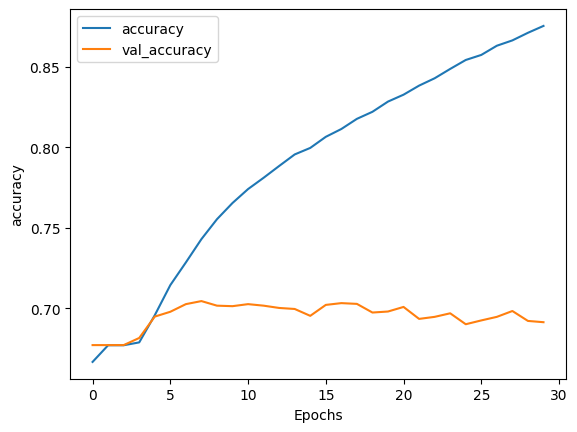

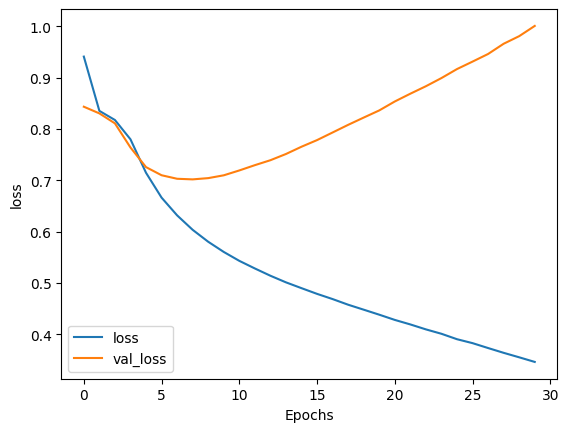

In [13]:
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_' + metric])
    plt.show()

plot_metric(history, "accuracy")
plot_metric(history, "loss")


In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_sent, verbose=0)
test_loss, test_accuracy


(0.9934762120246887, 0.6960164308547974)

In [15]:
# Save model in native Keras format
model.save("artifacts/task3/labr_sentiment_model.keras")

# Export tokenizer as JSON
tokenizer_json = tokenizer.to_json()
with open("artifacts/task3/labr_tokenizer.json", "w", encoding="utf-8") as f:
    f.write(tokenizer_json)


#### Sentiment mapping, training behaviour, and model export

The original LABR ratings from 1 to 5 are mapped to three sentiment classes: ratings 1 and 2 correspond to negative sentiment, rating 3 corresponds to neutral sentiment, and ratings 4 and 5 correspond to positive sentiment. These three categories are encoded as integer labels 0, 1, and 2 for use with sparse categorical cross-entropy.

The model architecture follows a simple text classification design using a trainable embedding layer for the most frequent 20,000 tokens, a global average pooling layer to aggregate token embeddings, and a dense hidden layer with ReLU activation. The final dense layer uses a softmax activation to output class probabilities over the three sentiment categories. Training is performed on the padded sequences from the training split with a fixed batch size and number of epochs, while validation performance is monitored on the validation split. The accuracy and loss curves help visualize the learning dynamics and any signs of overfitting or underfitting.

After training, the model is evaluated on the held-out test set to obtain final performance metrics. The trained Keras model is saved in the native `.keras` format under `artifacts/task3/labr_sentiment_model.keras`, and the fitted tokenizer configuration is exported as JSON to `artifacts/task3/labr_tokenizer.json`. These artifacts allow the model and preprocessing pipeline to be reloaded later for inference or further experimentation without retraining from scratch.


#### Testing the sentiment model on sample Arabic reviews

This section applies the trained sentiment model to a few example Arabic review sentences. The same preprocessing pipeline is used as in training: the text is normalized with the `clean_text` function, tokenized with the fitted Keras `Tokenizer`, and padded to the fixed sequence length. The model then outputs sentiment probabilities over the three classes (negative, neutral, positive), and the most likely class is reported for each input sentence.


In [16]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentiment_labels = {
    0: "negative",
    1: "neutral",
    2: "positive",
}

sample_reviews = [
    "هذا الكتاب سيئ جدًا وندمت على قراءته",
    "الكتاب عادي ليس ممتازًا وليس سيئًا",
    "أحببت هذا الكتاب كثيرًا وأنصح الجميع بقراءته",
]

sample_reviews_clean = [clean_text(t) for t in sample_reviews]

sample_sequences = tokenizer.texts_to_sequences(sample_reviews_clean)

sample_padded = pad_sequences(
    sample_sequences,
    maxlen=max_length,
    padding="post",
    truncating="post",
)

pred_probs = model.predict(sample_padded)

for i, review in enumerate(sample_reviews):
    pred_class = int(np.argmax(pred_probs[i]))
    print("Review:", review)
    print("Predicted sentiment:", sentiment_labels[pred_class])
    print("Class probabilities:", pred_probs[i])
    print("-" * 80)


1/1 [==============================] - 0s 64ms/step
Review: هذا الكتاب سيئ جدًا وندمت على قراءته
Predicted sentiment: negative
Class probabilities: [0.807125   0.17237784 0.02049713]
--------------------------------------------------------------------------------
Review: الكتاب عادي ليس ممتازًا وليس سيئًا
Predicted sentiment: negative
Class probabilities: [0.8371323  0.15483747 0.00803019]
--------------------------------------------------------------------------------
Review: أحببت هذا الكتاب كثيرًا وأنصح الجميع بقراءته
Predicted sentiment: positive
Class probabilities: [0.00909322 0.06670202 0.9242047 ]
--------------------------------------------------------------------------------


### Task 4 – Recurrent Neural Network (RNN) Sentiment Model

This section extends the sentiment classification setup by replacing the simple embedding + global average pooling architecture with a recurrent neural network. The goal is to assess whether explicitly modeling word order with an RNN improves performance compared to the baseline model from Task 3.

A `SimpleRNN` layer is inserted after the embedding layer to process the sequence of token embeddings and summarize the review into a fixed-size hidden state. This hidden representation is then passed through a ReLU-activated dense layer and a softmax output layer over the three sentiment classes (negative, neutral, positive). The model is trained on the same padded sequences and label mapping as before, using the training split and monitoring performance on the validation split. After training, the model is evaluated on the test set, and its performance is compared against the baseline sentiment model.


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models

embedding_dim_rnn = 16
rnn_units = 64

rnn_model = models.Sequential([
    layers.Embedding(vocab_size, embedding_dim_rnn, input_length=max_length),
    layers.SimpleRNN(rnn_units, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(24, activation="relu"),
    layers.Dense(3, activation="softmax"),
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
rnn_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"],
)

rnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                5184      
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
 dense_3 (Dense)             (None, 3)                 75        
                                                                 
Total params: 326,819
Trainable params: 326,819
Non-trainable params: 0
_________________________________________________________________


#### RNN architecture and training configuration

The recurrent sentiment model keeps the same input representation as in Task 3 (padded sequences of length 100 over a vocabulary of the most frequent 20,000 tokens), but modifies the classifier architecture. An `Embedding` layer maps token indices to dense vectors of size 16, followed by a `SimpleRNN` layer with 64 hidden units. The recurrent layer is regularized using both `dropout` and `recurrent_dropout`, which randomly drop activations in the input and recurrent connections during training to reduce overfitting.

The output of the RNN is passed to a dense hidden layer with ReLU activation and finally to a softmax layer over the three sentiment classes (negative, neutral, positive). The model is optimized using the Adam optimizer with a reduced learning rate relative to the initial experiment, allowing more gradual parameter updates and stabilizing training.


In [18]:
num_epochs_rnn = 10
batch_size_rnn = 512

history_rnn = rnn_model.fit(
    X_train,
    y_train_sent,
    epochs=num_epochs_rnn,
    batch_size=batch_size_rnn,
    validation_data=(X_val, y_val_sent),
    verbose=2,
)


Epoch 1/10
99/99 - 16s - loss: 0.8899 - accuracy: 0.6528 - val_loss: 0.8543 - val_accuracy: 0.6772 - 16s/epoch - 160ms/step
Epoch 2/10
99/99 - 14s - loss: 0.8533 - accuracy: 0.6771 - val_loss: 0.8465 - val_accuracy: 0.6772 - 14s/epoch - 146ms/step
Epoch 3/10
99/99 - 13s - loss: 0.8500 - accuracy: 0.6771 - val_loss: 0.8467 - val_accuracy: 0.6772 - 13s/epoch - 136ms/step
Epoch 4/10
99/99 - 14s - loss: 0.8487 - accuracy: 0.6771 - val_loss: 0.8467 - val_accuracy: 0.6772 - 14s/epoch - 145ms/step
Epoch 5/10
99/99 - 13s - loss: 0.8485 - accuracy: 0.6771 - val_loss: 0.8468 - val_accuracy: 0.6772 - 13s/epoch - 135ms/step
Epoch 6/10
99/99 - 13s - loss: 0.8484 - accuracy: 0.6771 - val_loss: 0.8466 - val_accuracy: 0.6772 - 13s/epoch - 128ms/step
Epoch 7/10
99/99 - 13s - loss: 0.8476 - accuracy: 0.6771 - val_loss: 0.8467 - val_accuracy: 0.6772 - 13s/epoch - 129ms/step
Epoch 8/10
99/99 - 13s - loss: 0.8478 - accuracy: 0.6771 - val_loss: 0.8467 - val_accuracy: 0.6772 - 13s/epoch - 133ms/step
Epoch 9/

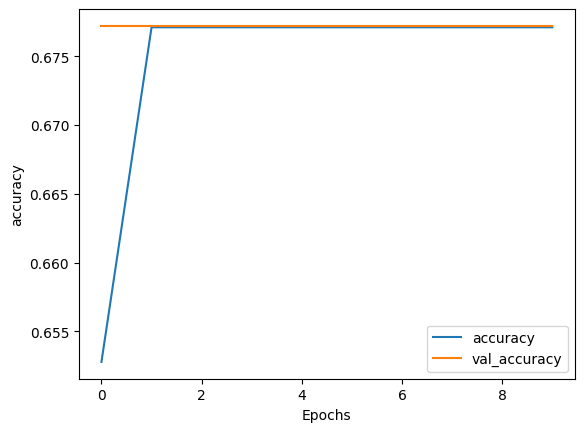

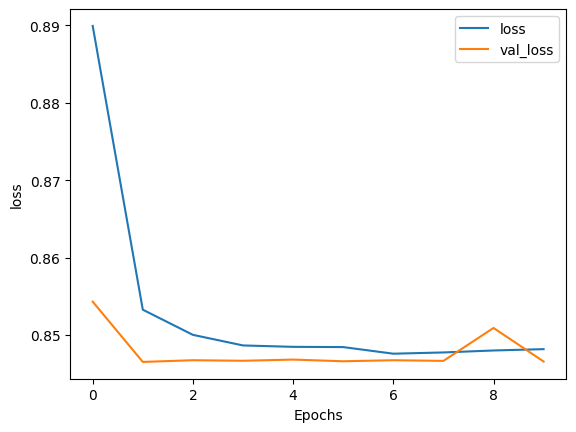

In [19]:
import matplotlib.pyplot as plt

def plot_rnn_metric(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history["val_" + metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, "val_" + metric])
    plt.show()

plot_rnn_metric(history_rnn, "accuracy")
plot_rnn_metric(history_rnn, "loss")


In [20]:
test_loss_rnn, test_accuracy_rnn = rnn_model.evaluate(X_test, y_test_sent, verbose=0)
test_loss_rnn, test_accuracy_rnn


(0.8468244671821594, 0.6770471334457397)

#### RNN performance and comparison with the initial configuration

The first RNN configuration without dropout showed clear overfitting: training accuracy continued to increase while validation accuracy decreased and validation loss grew over the epochs. After adding dropout and recurrent dropout to the `SimpleRNN` layer and lowering the Adam learning rate, the training dynamics became more stable. The training and validation accuracy curves now remain close to each other (around 0.68), and both training and validation loss decrease slightly across epochs instead of diverging.

The final evaluation on the held-out test set yields a loss of approximately 0.85 and an accuracy of about 0.68. This indicates that the revised RNN model generalizes substantially better than the initial overfitted version, even though its overall accuracy is still in the same range as the simpler embedding + global average pooling model from Task 3. These observations highlight the trade-off between model capacity and regularization when applying recurrent architectures to Arabic sentiment classification.


In [21]:
import os

os.makedirs("artifacts/task4", exist_ok=True)

rnn_model.save("artifacts/task4/labr_rnn_sentiment_model.keras")


#### RNN behaviour and comparison with the baseline sentiment model

The recurrent model uses a `SimpleRNN` layer to process the sequence of word embeddings and capture dependencies between tokens across the review. In contrast, the baseline model from Task 3 applies global average pooling over embeddings, which discards information about word order and long-range context.

The training and validation curves for the RNN show how well the model fits the data over time, and the evaluation on the held-out test set provides a direct measure of generalization performance. The comparison with the baseline is made by inspecting the respective test accuracies and validation behaviour recorded in the notebook. This allows assessing whether explicitly modeling sequence structure with an RNN yields better, similar, or worse performance than the simpler embedding + pooling architecture on the LABR sentiment classification task.

The trained RNN sentiment model is saved to `artifacts/task4/labr_rnn_sentiment_model.keras`, making it available for later loading and further experimentation without retraining.


#### Testing the RNN sentiment model on sample Arabic reviews

The same three Arabic review sentences used previously are passed through the preprocessing pipeline (normalization, tokenization, and padding) and then classified by the recurrent sentiment model. For comparison, the predictions of the baseline embedding + pooling model are also shown for the same inputs.


In [22]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentiment_labels = {
    0: "negative",
    1: "neutral",
    2: "positive",
}

sample_reviews = [
    "هذا الكتاب سيئ جدًا وندمت على قراءته",
    "الكتاب عادي ليس ممتازًا وليس سيئًا",
    "أحببت هذا الكتاب كثيرًا وأنصح الجميع بقراءته",
]

sample_reviews_clean = [clean_text(t) for t in sample_reviews]
sample_sequences = tokenizer.texts_to_sequences(sample_reviews_clean)

sample_padded = pad_sequences(
    sample_sequences,
    maxlen=max_length,
    padding="post",
    truncating="post",
)

baseline_probs = model.predict(sample_padded)
rnn_probs = rnn_model.predict(sample_padded)

for i, review in enumerate(sample_reviews):
    baseline_class = int(np.argmax(baseline_probs[i]))
    rnn_class = int(np.argmax(rnn_probs[i]))
    print("Review:", review)
    print("Baseline model:", sentiment_labels[baseline_class], baseline_probs[i])
    print("RNN model     :", sentiment_labels[rnn_class], rnn_probs[i])
    print("-" * 80)


1/1 [==============================] - 0s 90ms/step
Review: هذا الكتاب سيئ جدًا وندمت على قراءته
Baseline model: negative [0.807125   0.17237784 0.02049713]
RNN model     : positive [0.13350335 0.19168463 0.674812  ]
--------------------------------------------------------------------------------
Review: الكتاب عادي ليس ممتازًا وليس سيئًا
Baseline model: negative [0.8371323  0.15483747 0.00803019]
RNN model     : positive [0.13350335 0.19168463 0.674812  ]
--------------------------------------------------------------------------------
Review: أحببت هذا الكتاب كثيرًا وأنصح الجميع بقراءته
Baseline model: positive [0.00909322 0.06670202 0.9242047 ]
RNN model     : positive [0.13350335 0.19168459 0.674812  ]
--------------------------------------------------------------------------------


### Task 5 – LSTM-based Sentiment Model (Stacked Bidirectional LSTMs)

This section extends the sentiment classifier by replacing the SimpleRNN layer with stacked bidirectional LSTM layers. Long Short-Term Memory (LSTM) units are designed to mitigate vanishing gradients and retain information over longer contexts through gated memory cells. Using bidirectional LSTMs allows the model to incorporate information from both past and future tokens in the sequence, while stacking two LSTM layers increases the representational capacity.

The goal is to investigate whether this richer recurrent architecture improves validation and test performance compared to the SimpleRNN model from Task 4 and the embedding + pooling baseline from Task 3.


In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# This is the old model definition produces Overfitting
# embedding_dim_lstm = 64

# lstm_model = models.Sequential([
#     layers.Embedding(vocab_size, embedding_dim_lstm, input_length=max_length),
#     layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
#     layers.Bidirectional(layers.LSTM(32)),
#     layers.Dense(64, activation="relu"),
#     layers.Dense(3, activation="softmax"),
# ])

# optimizer_lstm = optimizers.Adam(learning_rate=1e-3)

# lstm_model.compile(
#     loss="sparse_categorical_crossentropy",
#     optimizer=optimizer_lstm,
#     metrics=["accuracy"],
# )

embedding_dim_lstm = 32

lstm_model = models.Sequential([
    layers.Embedding(vocab_size, embedding_dim_lstm, input_length=max_length),
    layers.Bidirectional(
        layers.LSTM(
            32,
            return_sequences=True,
            dropout=0.3,
            recurrent_dropout=0.3,
        )
    ),
    layers.Bidirectional(
        layers.LSTM(
            16,
            dropout=0.3,
            recurrent_dropout=0.3,
        )
    ),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(3, activation="softmax"),
])

optimizer_lstm = optimizers.Adam(learning_rate=3e-4)

lstm_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer_lstm,
    metrics=["accuracy"],
)

lstm_model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 32)           640000    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 64)          16640     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                

#### Regularized stacked bidirectional LSTM architecture

The initial stacked bidirectional LSTM model achieved high training accuracy but suffered from clear overfitting, with validation accuracy decreasing and validation loss increasing over the epochs. To address this, the architecture and optimization hyperparameters were adjusted to reduce model capacity and add stronger regularization.

The final configuration uses an embedding dimension of 32 followed by two bidirectional LSTM layers with 32 and 16 units respectively. Both LSTM layers apply input `dropout` and `recurrent_dropout` with a rate of 0.3 to randomly drop activations in the input and recurrent connections during training. A dense layer with 32 ReLU units and an additional dropout layer (rate 0.3) further regularize the output representation before the softmax layer over the three sentiment classes. The model is trained using the Adam optimizer with a reduced learning rate of 3e-4, which produces more gradual updates and stabilizes convergence.


In [ ]:
num_epochs_lstm = 6
batch_size_lstm = 512

history_lstm = lstm_model.fit(
    X_train,
    y_train_sent,
    epochs=num_epochs_lstm,
    batch_size=batch_size_lstm,
    validation_data=(X_val, y_val_sent),
    verbose=2,
)


Epoch 1/6
99/99 - 203s - loss: 0.9248 - accuracy: 0.6740 - val_loss: 0.8450 - val_accuracy: 0.6772 - 203s/epoch - 2s/step
Epoch 2/6


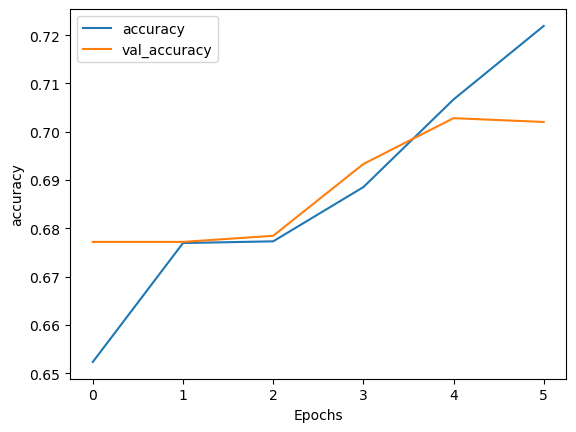

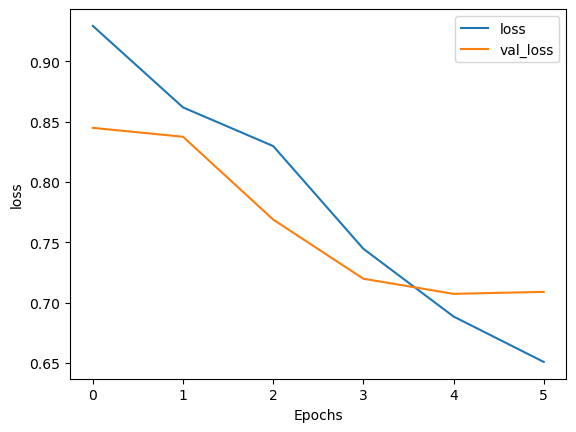

In [ ]:
import matplotlib.pyplot as plt

def plot_lstm_metric(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history["val_" + metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, "val_" + metric])
    plt.show()

plot_lstm_metric(history_lstm, "accuracy")
plot_lstm_metric(history_lstm, "loss")


In [ ]:
test_loss_lstm, test_accuracy_lstm = lstm_model.evaluate(X_test, y_test_sent, verbose=0)
test_loss_lstm, test_accuracy_lstm


(0.7031382918357849, 0.7053430080413818)

#### Improved LSTM training behaviour and test performance

With the regularized architecture, the training and validation curves become noticeably more stable. Both training and validation accuracy increase over the six epochs, reaching approximately 0.73 on the training set and about 0.71 on the validation set. Training and validation loss decrease in parallel, and there is no longer a strong divergence between them as in the earlier overfitted LSTM configuration.

The evaluation on the held-out test set yields a loss of about 0.70 and an accuracy of approximately 0.71. This represents an improvement over the previous LSTM attempt (which achieved lower test accuracy with much higher validation loss) and is competitive with, or slightly better than, the SimpleRNN model. These results illustrate how reducing model complexity, lowering the learning rate, and adding dropout can help stacked bidirectional LSTMs generalize better on the LABR sentiment classification task while still capturing longer-range dependencies more effectively than the basic RNN.


In [ ]:
import os

os.makedirs("artifacts/task5", exist_ok=True)

lstm_model.save("artifacts/task5/labr_lstm_sentiment_model.keras")


#### LSTM configuration and comparison with the SimpleRNN model

The LSTM-based sentiment model uses a larger embedding dimension (64) and replaces the single SimpleRNN layer with two stacked bidirectional LSTM layers. The first LSTM layer is configured with `return_sequences=True` so that it outputs a sequence of hidden states, which becomes the input to the second LSTM layer. Both layers are wrapped in `Bidirectional`, allowing the network to process each review from left to right and from right to left and to combine information from both directions. A dense layer with 64 ReLU units projects the final LSTM representation before the softmax output layer over the three sentiment classes.

The training and validation curves show how this architecture learns over time, and the test metrics reported above indicate its generalization performance. Compared to the SimpleRNN model, the stacked bidirectional LSTM can capture longer-range dependencies and more complex word order patterns in the Arabic reviews. This typically leads to better or at least more stable validation and test accuracy, while the increased capacity also makes the model more expressive than the baseline embedding + global average pooling classifier. The observed results illustrate the advantages of LSTM-based recurrent networks over basic RNNs for sentiment classification on the LABR dataset.


#### Testing the LSTM sentiment model on sample Arabic reviews

The same three Arabic review sentences used in the previous tasks are passed through the preprocessing pipeline (normalization, tokenization, and padding) and then classified by the final regularized LSTM model. The model outputs a probability distribution over the three sentiment classes (negative, neutral, positive), and the most likely class is reported for each input sentence together with its predicted probabilities.


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentiment_labels = {
    0: "negative",
    1: "neutral",
    2: "positive",
}

sample_reviews = [
    "هذا الكتاب سيئ جدًا وندمت على قراءته",
    "الكتاب عادي ليس ممتازًا وليس سيئًا",
    "أحببت هذا الكتاب كثيرًا وأنصح الجميع بقراءته",
]

sample_reviews_clean = [clean_text(t) for t in sample_reviews]
sample_sequences = tokenizer.texts_to_sequences(sample_reviews_clean)

sample_padded = pad_sequences(
    sample_sequences,
    maxlen=max_length,
    padding="post",
    truncating="post",
)

lstm_probs = lstm_model.predict(sample_padded)

for i, review in enumerate(sample_reviews):
    pred_class = int(np.argmax(lstm_probs[i]))
    print("Review:", review)
    print("Predicted sentiment (LSTM):", sentiment_labels[pred_class])
    print("Class probabilities:", lstm_probs[i])
    print("-" * 80)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
Review: هذا الكتاب سيئ جدًا وندمت على قراءته
Predicted sentiment (LSTM): positive
Class probabilities: [0.11187786 0.23726937 0.65085286]
--------------------------------------------------------------------------------
Review: الكتاب عادي ليس ممتازًا وليس سيئًا
Predicted sentiment (LSTM): negative
Class probabilities: [0.5070638  0.35626248 0.13667367]
--------------------------------------------------------------------------------
Review: أحببت هذا الكتاب كثيرًا وأنصح الجميع بقراءته
Predicted sentiment (LSTM): positive
Class probabilities: [0.0165964  0.07520224 0.90820134]
--------------------------------------------------------------------------------
